# Berlin

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
immo = pd.read_csv('immo.csv')
immo_with_NaN = pd.read_csv('immo_data.csv')
alt_immo = pd.read_csv('alt_immo.csv')
#immo.dtypes

In [3]:
pd.set_option('display.max_columns', None)
display(immo.head(1))
print(immo.shape)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,0.0,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,unknown,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,77.111,unknown,2009.1,89.11,0.21111,May19,6.92,4


(267810, 52)


In [4]:
df_berlin = immo[immo['regio1'] == 'Berlin'].reset_index(drop = True)
df_berlin_NaN = immo_with_NaN[immo_with_NaN['regio1'] == 'Berlin'].reset_index(drop = True)
df_berlin_alt = alt_immo[alt_immo['regio1'] == 'Berlin'].reset_index(drop = True)
df_berlin.shape

(10327, 52)

In [5]:
cols = ['balcony','hasKitchen','lift','garden']
df_berlin[cols] = df_berlin[cols].replace({True:1,False:0})

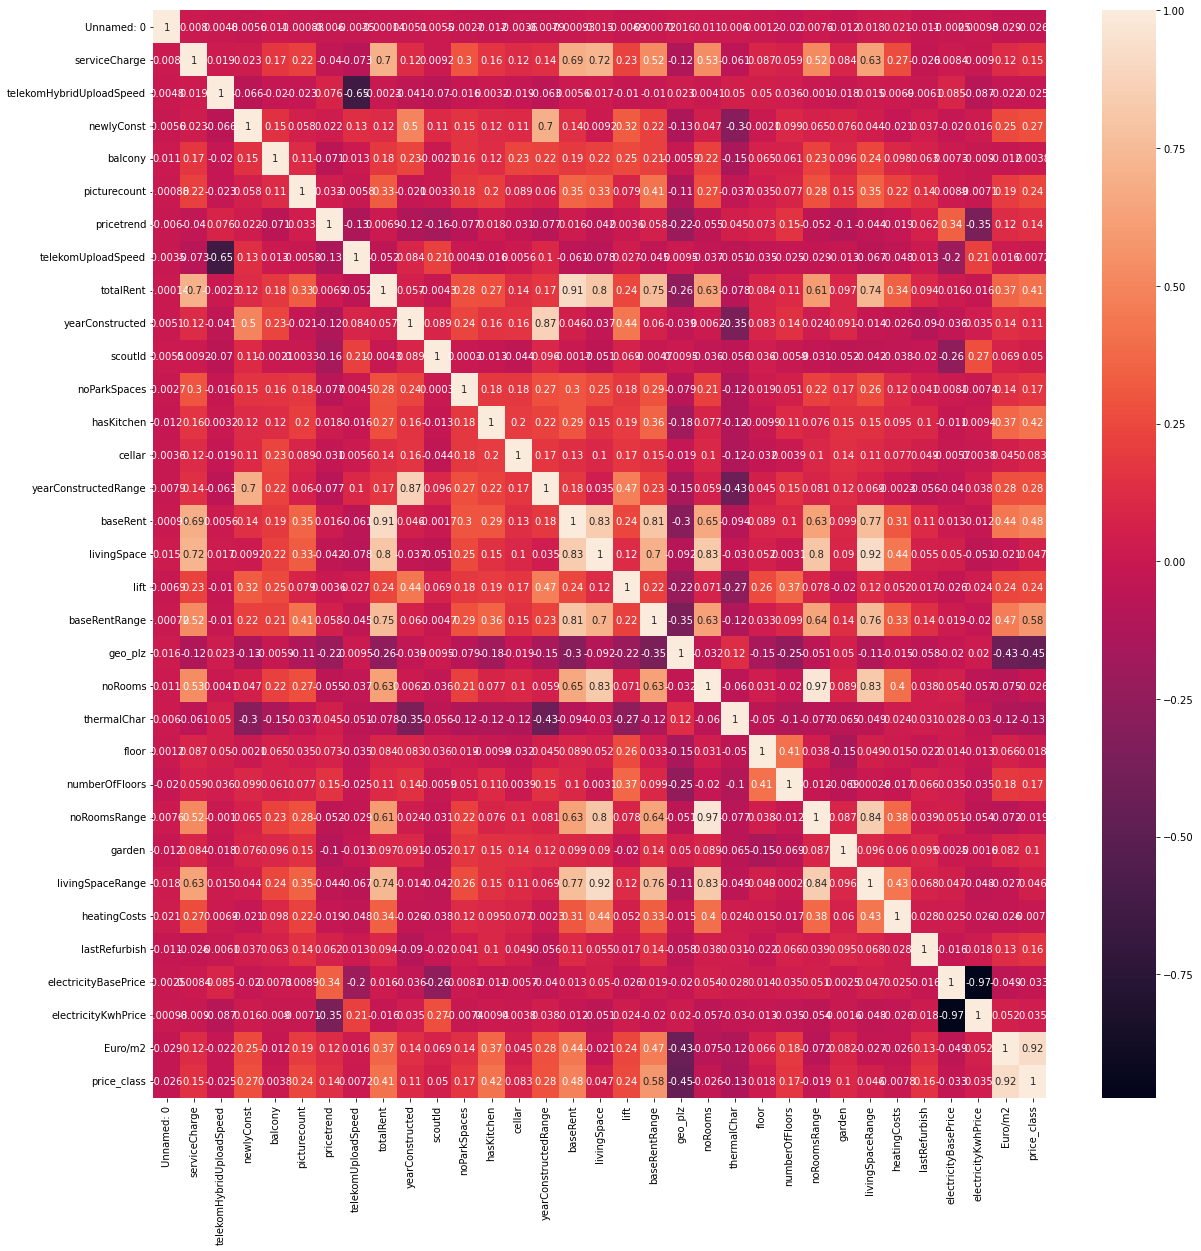

In [6]:
correlations_matrix = df_berlin.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [7]:
df_berlin.to_csv('immo_berlin.csv')

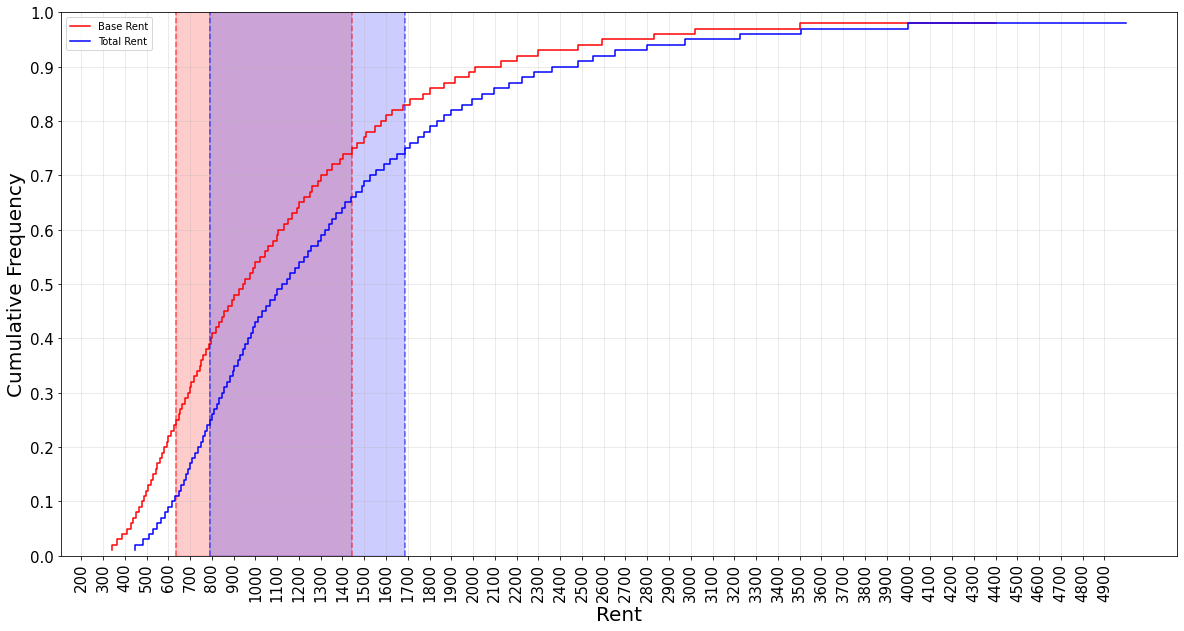

In [8]:
baseRent=df_berlin_NaN.baseRent
totalRent=df_berlin_NaN.totalRent.dropna()
base_color="Red"
total_color="Blue"
percentiles = (25,75)
base_percentile_values=[np.percentile(baseRent,x).astype(int) for x in percentiles]
total_percentile_values=[np.percentile(totalRent,x).astype(int) for x in percentiles]
x_values = [np.percentile(baseRent,x+1) for x in range(1,99)]
plt.figure(figsize=(20,10))
plt.step(x_values,[x/100 for x in range(1,99)],label="Base Rent",color=base_color)
for percentile in percentiles:
    plt.plot([np.percentile(baseRent,percentile),np.percentile(baseRent,percentile)],
            [0,1],color=base_color,linestyle="--",alpha=0.6)
x_values = [np.percentile(totalRent,x+1) for x in range(1,99)]
plt.step(x_values,[x/100 for x in range(1,99)],label="Total Rent",color=total_color)
for percentile in percentiles:
    plt.plot([np.percentile(totalRent,percentile),np.percentile(totalRent,percentile)],
            [0,1],color=total_color,linestyle="--",alpha=0.6)
xtick_list=sorted(np.array([base_percentile_values,total_percentile_values]).flatten().astype(int))
plt.xticks([x for x in range(0,int(max(x_values))) if x%100==0],rotation=90, fontsize=15)
plt.yticks([x/100 for x in range(101) if x%10==0], fontsize=15)
plt.ylim(0,1)
plt.legend()
plt.grid(alpha=0.3)
plt.fill_between(base_percentile_values,percentiles,color=base_color,alpha=0.2)
plt.fill_between(total_percentile_values,percentiles,color=total_color,alpha=0.2)
plt.xlabel("Rent", fontsize=20)
plt.ylabel("Cumulative Frequency", fontsize=20)
plt.show()

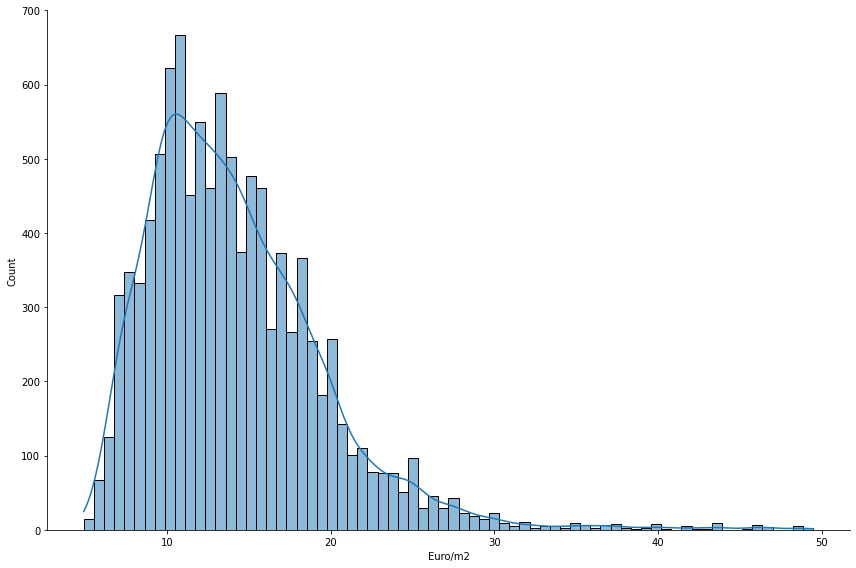

14.16

In [9]:
sns.displot(df_berlin['Euro/m2'], kde=True, height=8, aspect=12/8)
plt.show()
display(round(df_berlin['Euro/m2'].mean(), 2))

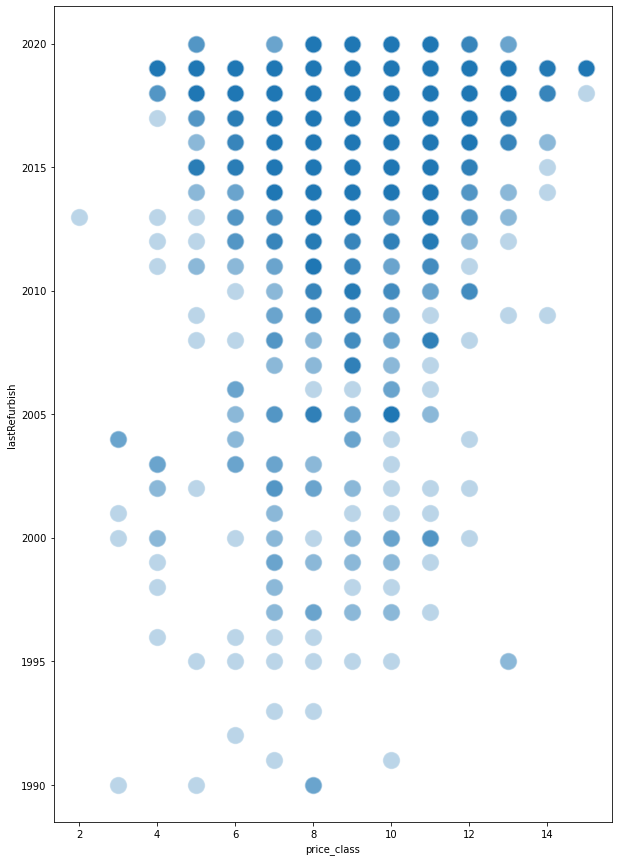

In [10]:
data_lastRefurbish = df_berlin_alt[df_berlin_alt.lastRefurbish <= 2021]
data_lastRefurbish = data_lastRefurbish[data_lastRefurbish.lastRefurbish >= 1990]
fig = plt.figure(figsize=(10,15))
sns.scatterplot(x='price_class',y='lastRefurbish',data=data_lastRefurbish, alpha=0.3, s=300)
plt.show()

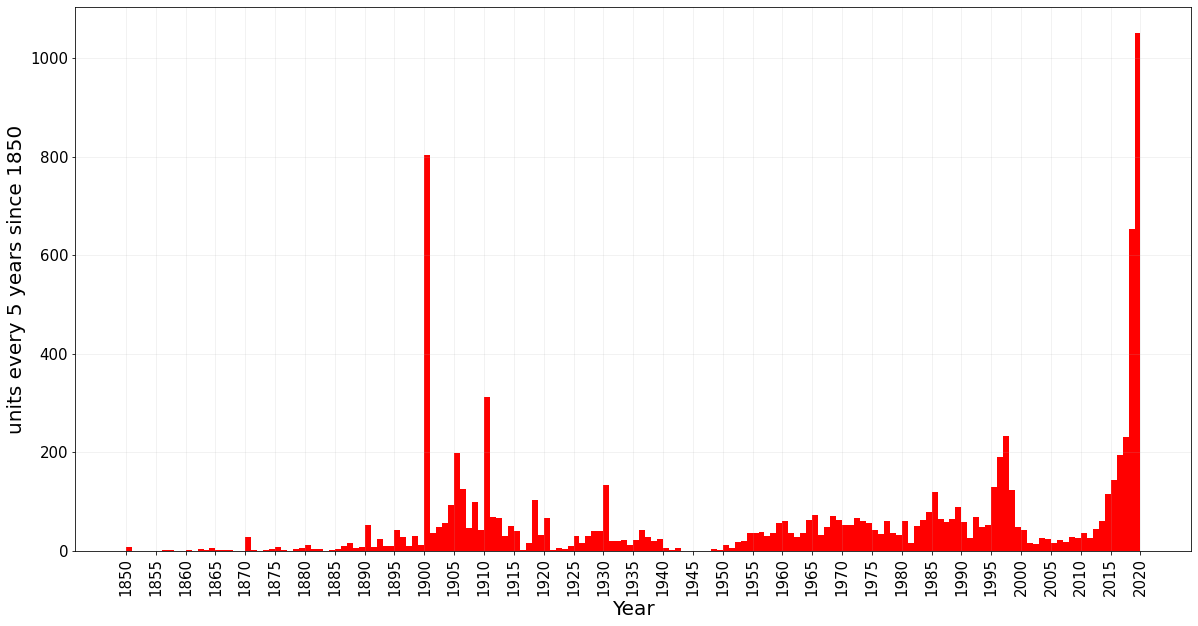

In [11]:
plt.figure(figsize=(20,10))
df_berlin_alt.yearConstructed.hist(bins=[x for x in range(1850,2021) if x%1==0], color = "red")
plt.xticks([x for x in range(1850,2021) if x%5==0],rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.2)
plt.xlabel("Year", fontsize=20)
plt.ylabel("units every 5 years since 1850", fontsize=20)
plt.show()

In [12]:
df_berlin_1 = df_berlin[df_berlin['geo_plz'].between(10000, 12000)]
df_berlin_2 = df_berlin[df_berlin['geo_plz'].between(12000, 13000)]
df_berlin_3 = df_berlin[df_berlin['geo_plz'].between(13000, 14000)]
df_berlin_4 = df_berlin[df_berlin['geo_plz'].between(14000, 15000)]

Text(0, 0.5, 'baseRent')

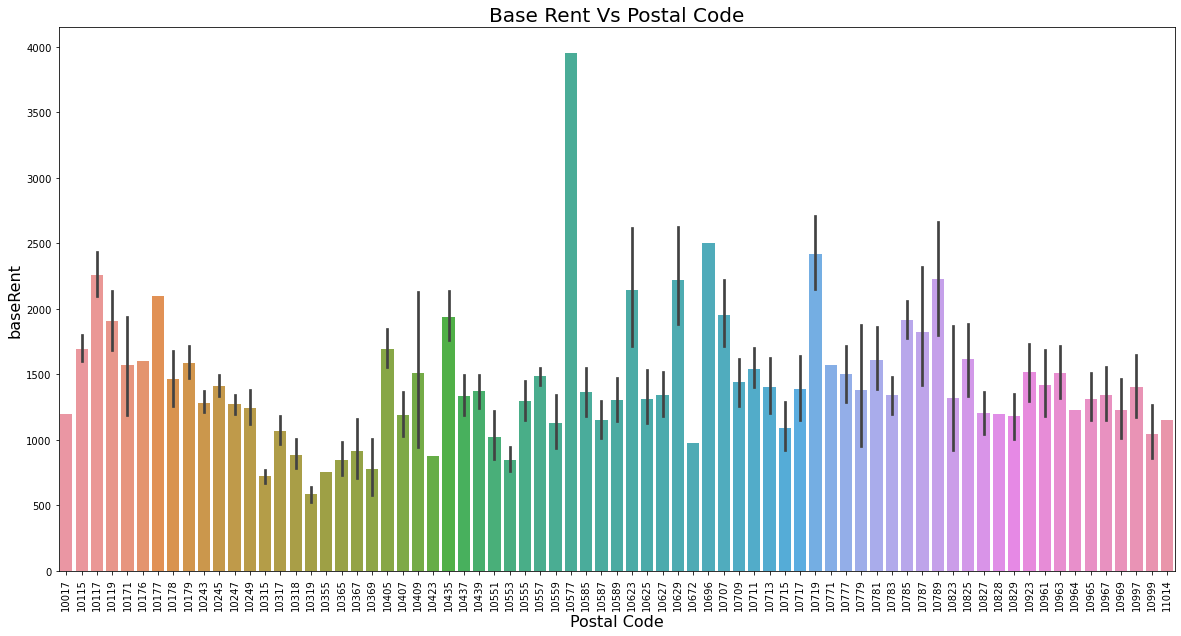

In [13]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

Text(0, 0.5, 'baseRent')

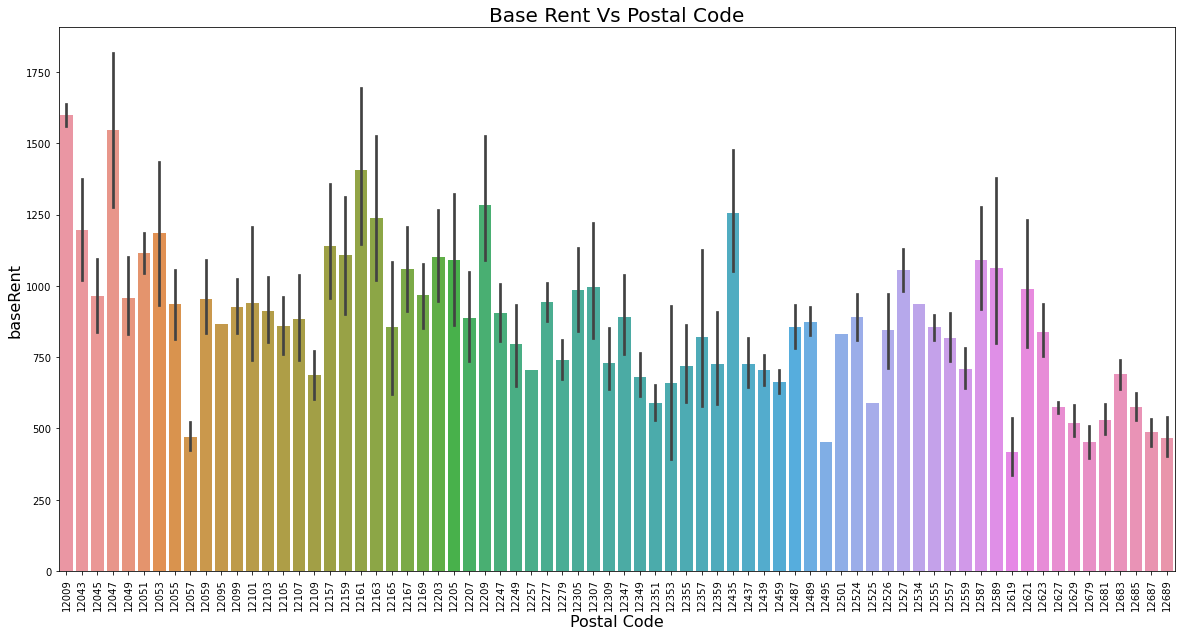

In [14]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

Text(0, 0.5, 'baseRent')

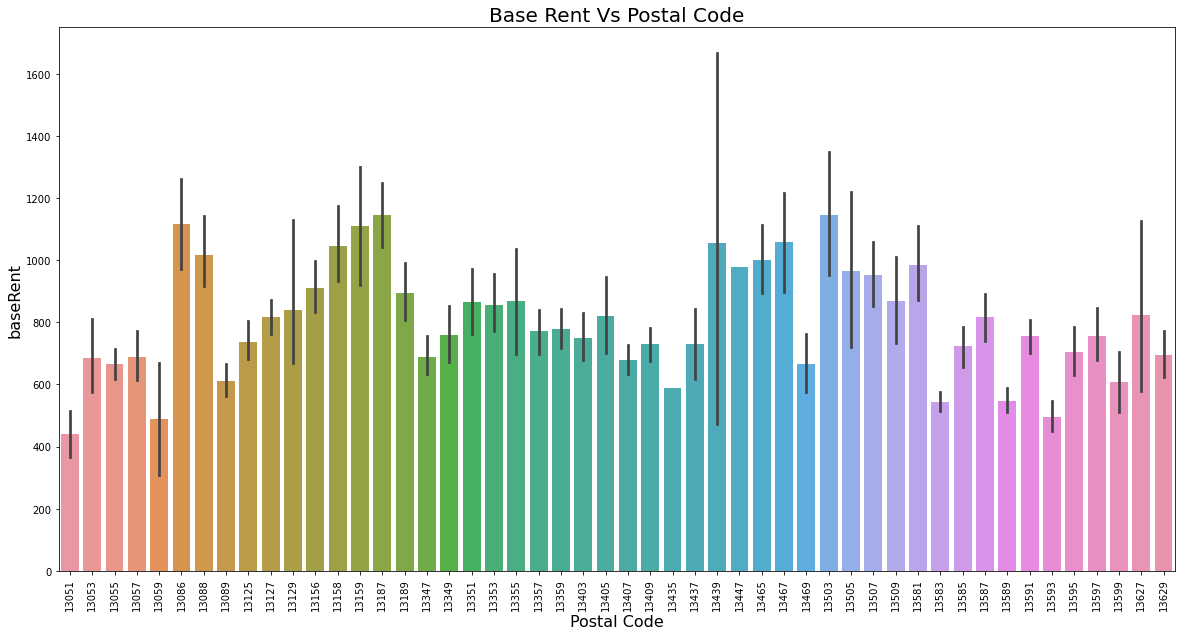

In [15]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_3)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

Text(0, 0.5, 'baseRent')

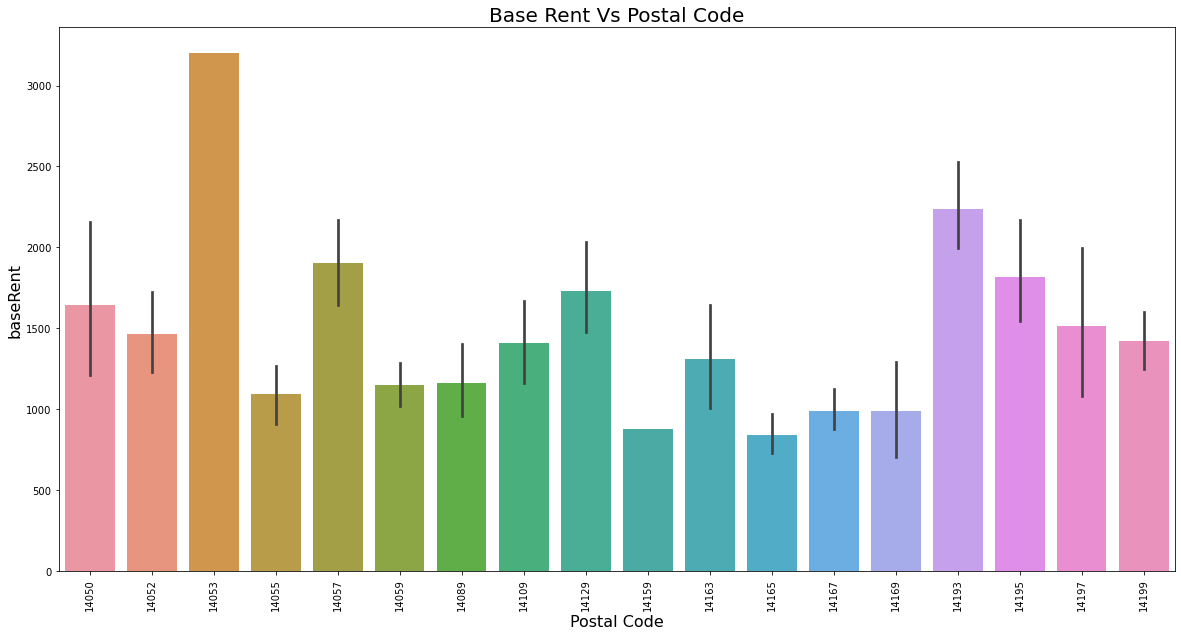

In [16]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('baseRent', fontsize = 16)

# Districts of Berlin
### Scaped Data from Notebook 06

In [17]:
#berlin_postal_code = pd.read_excel('Bezirke.xlsx')
berlin_postal_code = pd.read_csv('postal.csv')
pd.set_option('display.max_rows', None)
berlin_postal_code

,PLZ,Ort,Ortsteil
0,10115,Berlin,"Mitte, Wedding"
1,10117,Berlin,"Mitte, Tiergarten"
2,10119,Berlin,"Mitte, Prenzlauer Berg"
3,10178,Berlin,Mitte
4,10179,Berlin,"Friedrichshain, Kreuzberg, Mitte"
5,10243,Berlin,"Friedrichshain, Kreuzberg, Mitte"
6,10245,Berlin,"Alt-Treptow, Friedrichshain"
7,10247,Berlin,"Friedrichshain, Prenzlauer Berg"
8,10249,Berlin,"Friedrichshain, Prenzlauer Berg"
9,10315,Berlin,"Friedrichsfelde, Lichtenberg, Rummelsburg"


In [18]:
df_berlin = pd.merge(left=df_berlin, right=berlin_postal_code, left_on='geo_plz', right_on='PLZ')

In [19]:
df_berlin.head(3)

,Unnamed: 0,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,Euro/m2,price_class,PLZ,Ort,Ortsteil
0,45,Berlin,320.0,central_heating,unknown,0.0,False,1,10,4.99,40.0,1140.00,1973.1,115671495,1.0,unknown,1,Berlin,False,4.1,820.00,63,77.00,Berlin,unknown,unknown,negotiable,Metropolitan Park,Metropolitan_Park,1,6,ground_floor,13591,3.0,114.11,0.0,3.0,3,0,3,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,unknown,77.111,unknown,2009.1,89.11,0.21111,Feb20,10.65,8,13591,Berlin,"Falkenhagener Feld, Spandau, Staaken, Wilhelms..."
1,8576,Berlin,166.0,central_heating,ONE_YEAR_FREE,10.0,False,1,3,6.76,2.4,869.22,1971.0,110830352,0.0,electricity,0,Berlin,True,3.0,644.22,53,71.58,Berlin,unknown,unknown,unknown,S&uuml;dekumzeile,Südekumzeile,1,5,apartment,13591,2.0,81.00,3.0,3.1,2,0,3,Berlin,Staaken_Spandau,Das Objekt verfügt über einen Aufzug. Die ange...,Aufzug; Türsprechanlage; Warmwasserbereiter; K...,59.000,C,2009.1,89.11,0.21111,May19,9.00,6,13591,Berlin,"Falkenhagener Feld, Spandau, Staaken, Wilhelms..."
2,9730,Berlin,288.0,central_heating,ONE_YEAR_FREE,0.0,False,1,18,4.99,40.0,1199.00,1997.0,115617112,0.0,district_heating,1,Berlin,True,5.0,911.00,14,104.68,Berlin,fully_renovated,sophisticated,negotiable,Erna-Sack-Str.,Erna-Sack-Str.,0,6,apartment,13591,4.0,94.10,2.0,3.0,4,0,5,Berlin,Staaken_Spandau,-----Für max. 4 Personen.---\nDie 1997 erbaute...,"großer Südbalkon, Echtholzparkett im großem Wo...",77.111,unknown,2009.1,89.11,0.21111,Feb20,8.70,6,13591,Berlin,"Falkenhagener Feld, Spandau, Staaken, Wilhelms..."


In [20]:
#df_berlin['Ortsteil'].value_counts()

### EDA Districts

The mean base rent in Mitte is:  1666.15 Euro/month
The minimum base rent in Mitte is:  179.99 Euro/month
The maximum base rent in Mitte is:  7000.0 Euro/month
Based on  1640 records.


Text(0, 0.5, 'base Rent')

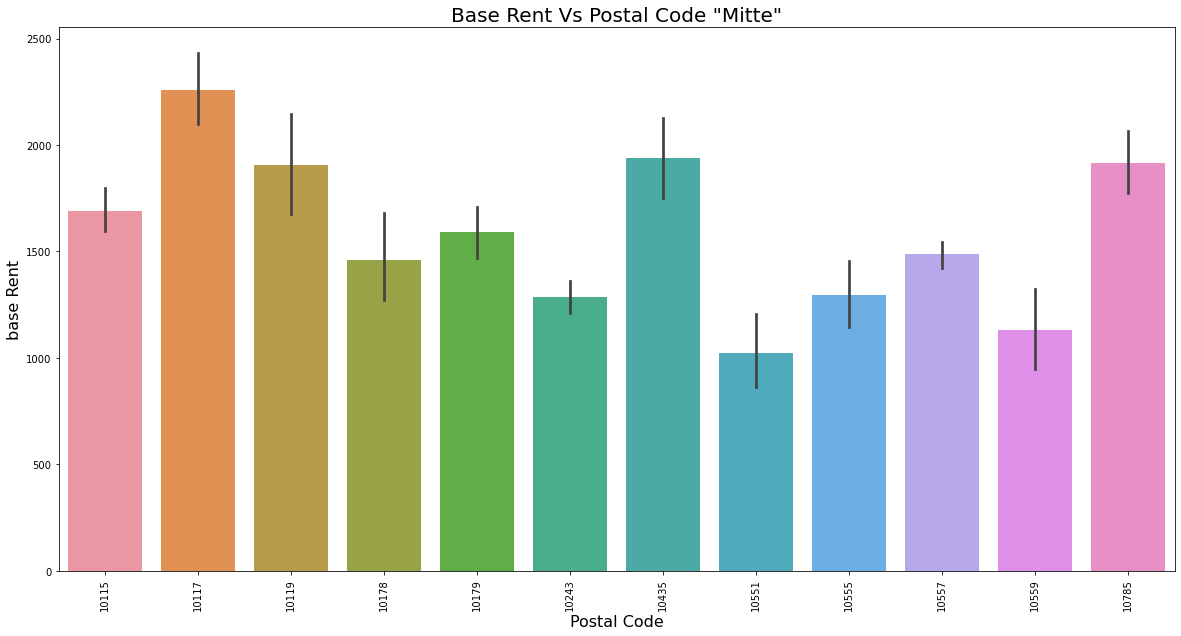

In [21]:
df_berlin_01_mitte = df_berlin[df_berlin['Ortsteil'].str.contains("Mitte")]
print("The mean base rent in Mitte is: ", round(df_berlin_01_mitte['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Mitte is: ", round(df_berlin_01_mitte['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Mitte is: ", round(df_berlin_01_mitte['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_01_mitte),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_01_mitte)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Mitte"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Friedrichshain is:  1342.49 Euro/month
The minimum base rent in Friedrichshain is:  221.1 Euro/month
The maximum base rent in Friedrichshain is:  5000.0 Euro/month
Based on  807 records.


Text(0, 0.5, 'base Rent')

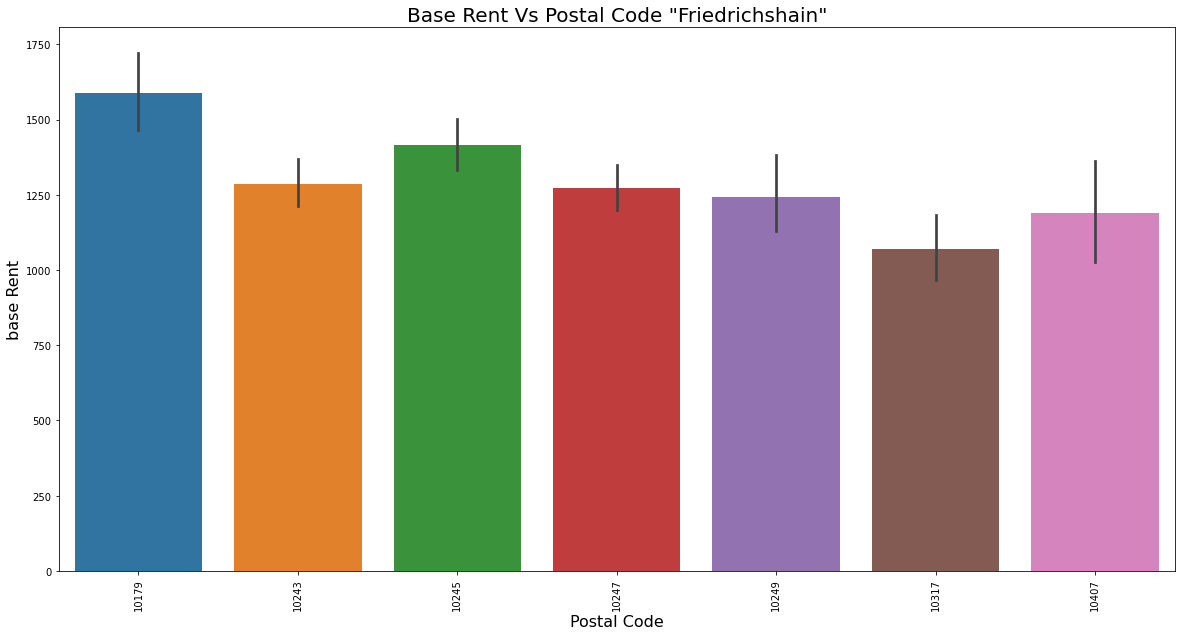

In [22]:
df_berlin_02_Friedrichshain = df_berlin[df_berlin['Ortsteil'].str.contains("Friedrichshain")]
print("The mean base rent in Friedrichshain is: ", round(df_berlin_02_Friedrichshain['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Friedrichshain is: ", round(df_berlin_02_Friedrichshain['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Friedrichshain is: ", round(df_berlin_02_Friedrichshain['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_02_Friedrichshain),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_02_Friedrichshain)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Friedrichshain"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Kreuzberg is:  1497.04 Euro/month
The minimum base rent in Kreuzberg is:  202.4 Euro/month
The maximum base rent in Kreuzberg is:  5700.0 Euro/month
Based on  745 records.


Text(0, 0.5, 'base Rent')

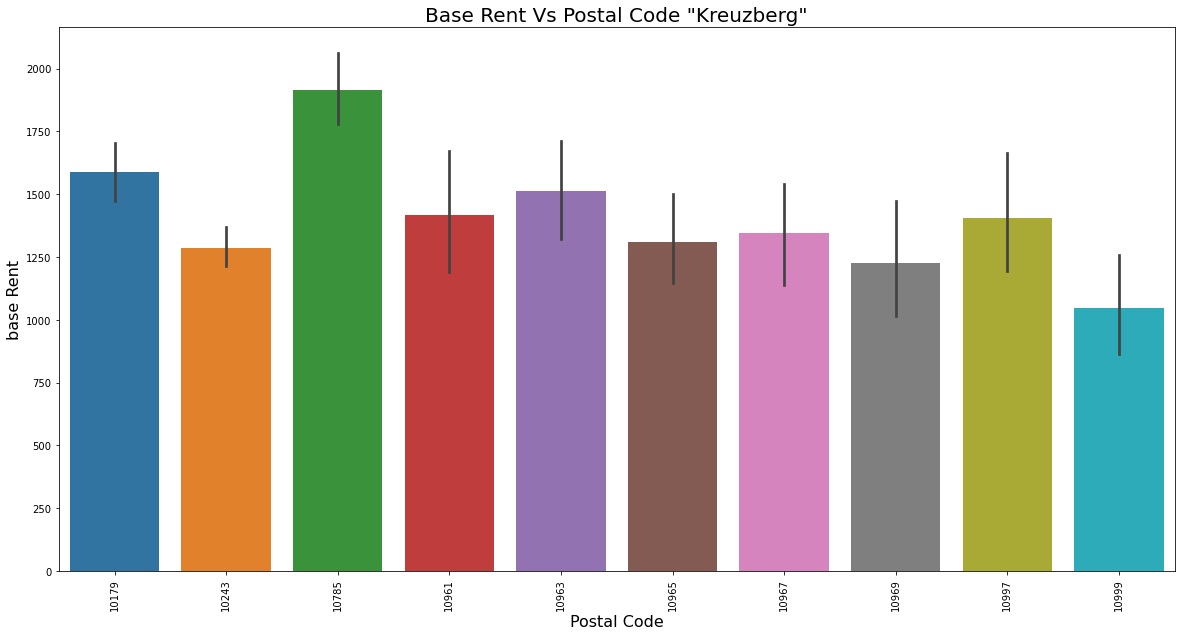

In [23]:
df_berlin_02_Kreuzberg = df_berlin[df_berlin['Ortsteil'].str.contains("Kreuzberg")]
print("The mean base rent in Kreuzberg is: ", round(df_berlin_02_Kreuzberg['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Kreuzberg is: ", round(df_berlin_02_Kreuzberg['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Kreuzberg is: ", round(df_berlin_02_Kreuzberg['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_02_Kreuzberg),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_02_Kreuzberg)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Kreuzberg"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Pankow is:  948.01 Euro/month
The minimum base rent in Pankow is:  229.87 Euro/month
The maximum base rent in Pankow is:  3681.0 Euro/month
Based on  624 records.


Text(0, 0.5, 'base Rent')

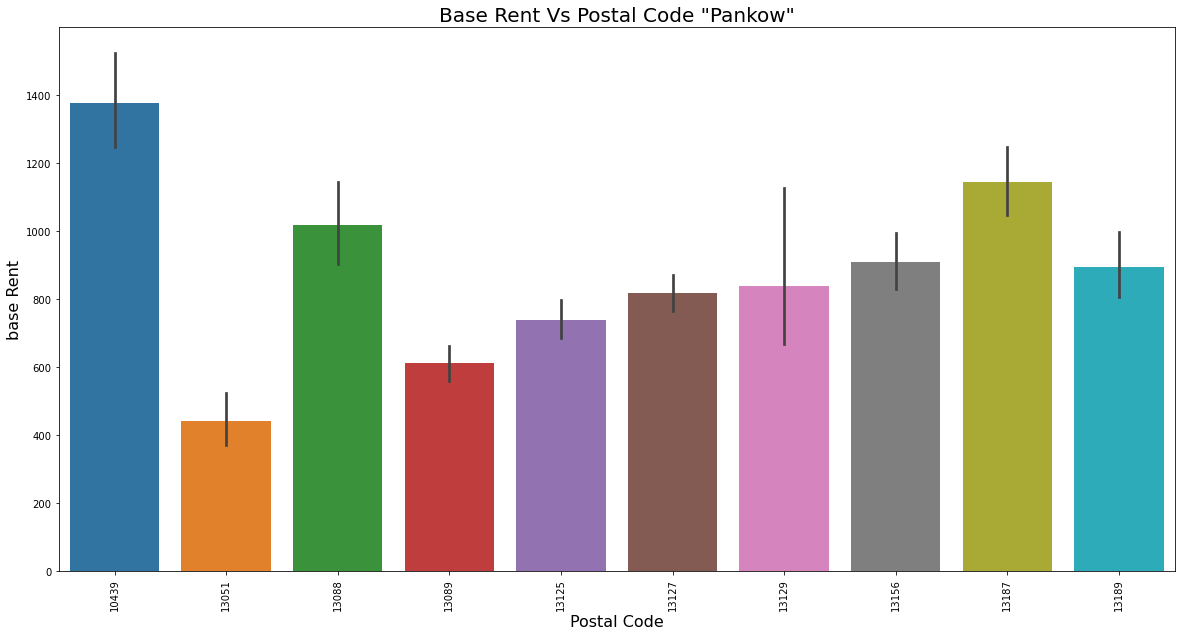

In [24]:
df_berlin_03_Pankow = df_berlin[df_berlin['Ortsteil'].str.contains("Pankow")]
print("The mean base rent in Pankow is: ", round(df_berlin_03_Pankow['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Pankow is: ", round(df_berlin_03_Pankow['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Pankow is: ", round(df_berlin_03_Pankow['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_03_Pankow),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_03_Pankow)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Pankow"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Charlottenburg is:  1552.67 Euro/month
The minimum base rent in Charlottenburg is:  227.02 Euro/month
The maximum base rent in Charlottenburg is:  9500.0 Euro/month
Based on  1087 records.


Text(0, 0.5, 'base Rent')

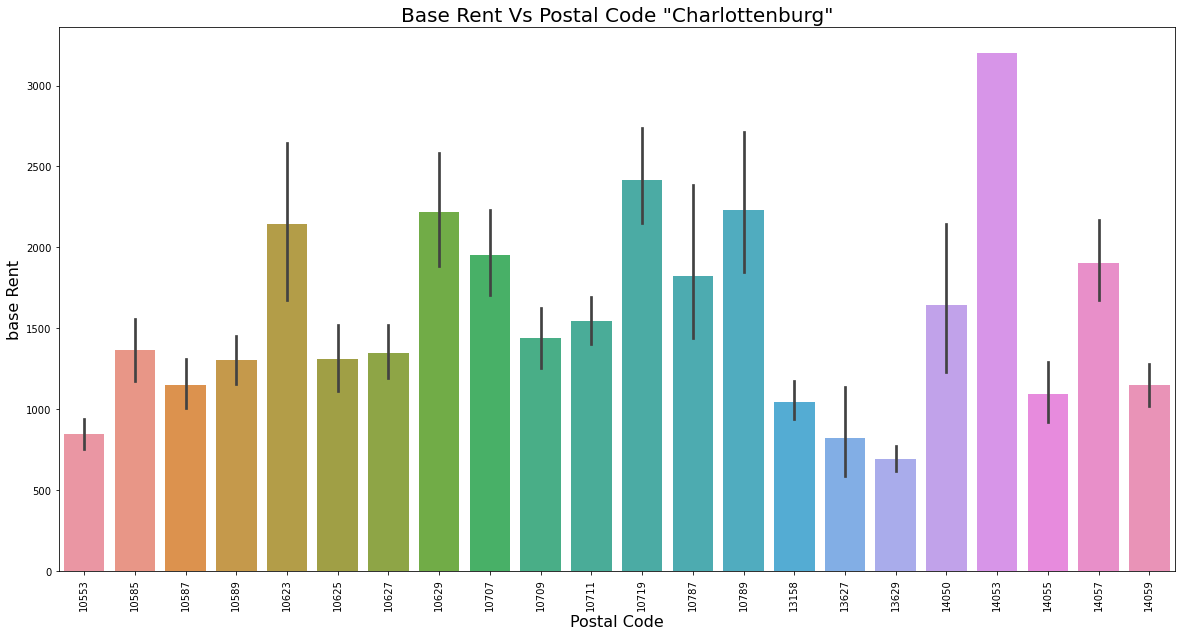

In [25]:
df_berlin_04_Charlottenburg = df_berlin[df_berlin['Ortsteil'].str.contains("Charlottenburg")]
print("The mean base rent in Charlottenburg is: ", round(df_berlin_04_Charlottenburg['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Charlottenburg is: ", round(df_berlin_04_Charlottenburg['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Charlottenburg is: ", round(df_berlin_04_Charlottenburg['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_04_Charlottenburg),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_04_Charlottenburg)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Charlottenburg"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Wilmersdorf is:  1750.7 Euro/month
The minimum base rent in Wilmersdorf is:  260.09 Euro/month
The maximum base rent in Wilmersdorf is:  8475.0 Euro/month
Based on  781 records.


Text(0, 0.5, 'base Rent')

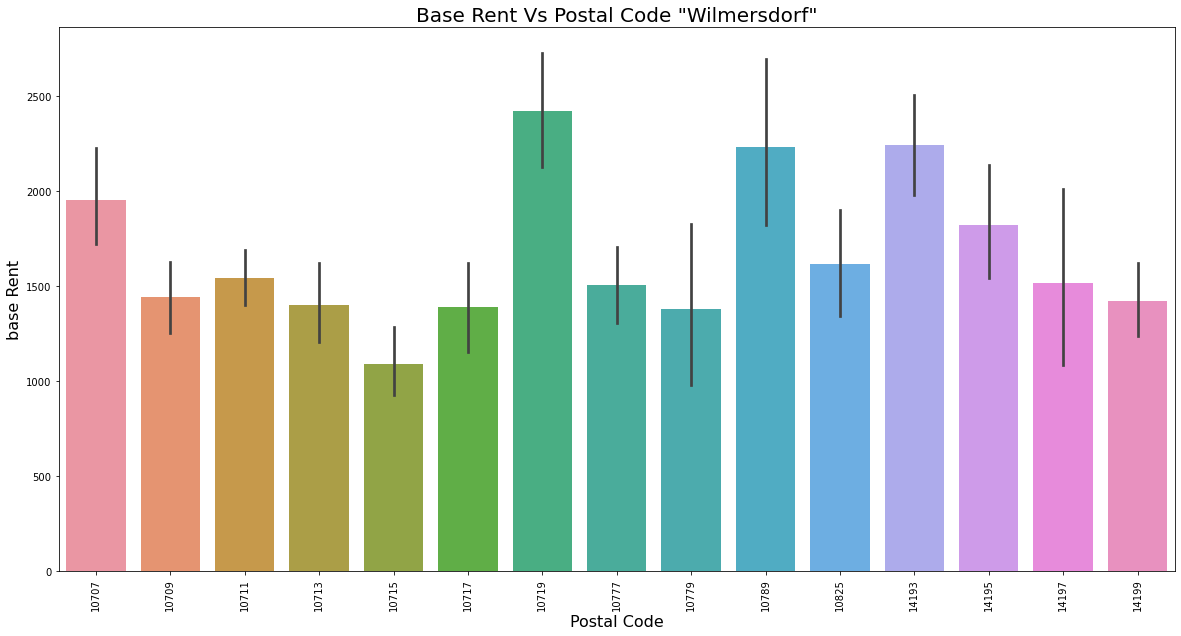

In [26]:
df_berlin_04_Wilmersdorf = df_berlin[df_berlin['Ortsteil'].str.contains("Wilmersdorf")]
print("The mean base rent in Wilmersdorf is: ", round(df_berlin_04_Wilmersdorf['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Wilmersdorf is: ", round(df_berlin_04_Wilmersdorf['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Wilmersdorf is: ", round(df_berlin_04_Wilmersdorf['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_04_Wilmersdorf),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_04_Wilmersdorf)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Wilmersdorf"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Spandau is:  787.24 Euro/month
The minimum base rent in Spandau is:  180.07 Euro/month
The maximum base rent in Spandau is:  4200.0 Euro/month
Based on  623 records.


Text(0, 0.5, 'base Rent')

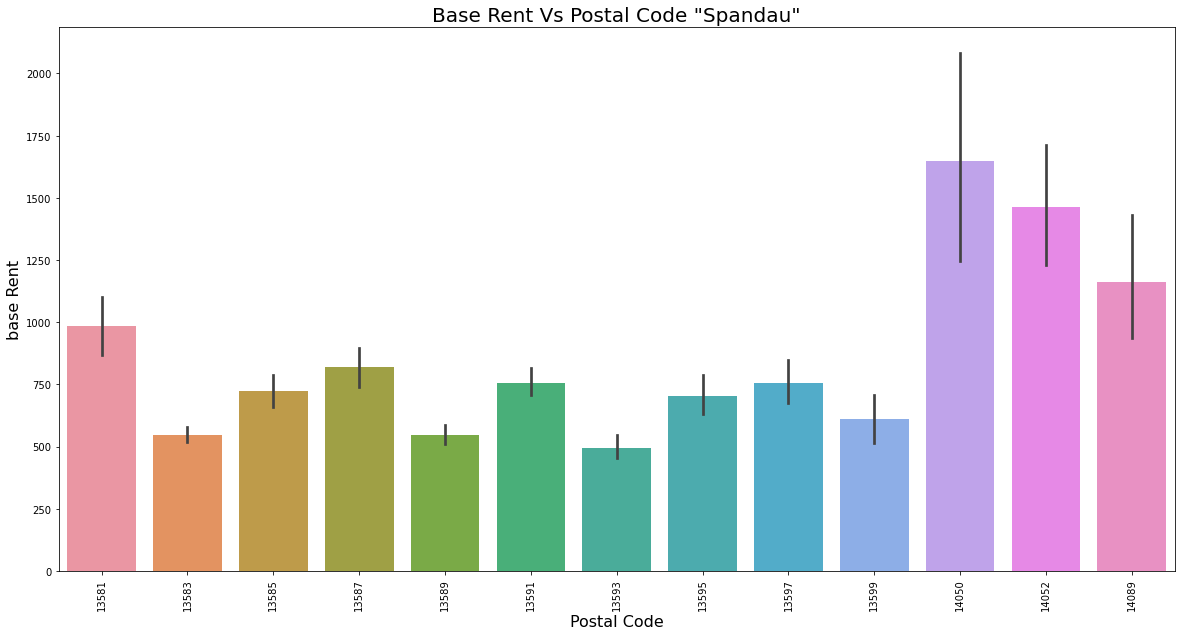

In [27]:
df_berlin_05_Spandau = df_berlin[df_berlin['Ortsteil'].str.contains("Spandau")]
print("The mean base rent in Spandau is: ", round(df_berlin_05_Spandau['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Spandau is: ", round(df_berlin_05_Spandau['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Spandau is: ", round(df_berlin_05_Spandau['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_05_Spandau),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_05_Spandau)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Spandau"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Steglitz is:  1130.47 Euro/month
The minimum base rent in Steglitz is:  227.85 Euro/month
The maximum base rent in Steglitz is:  6500.0 Euro/month
Based on  718 records.


Text(0, 0.5, 'base Rent')

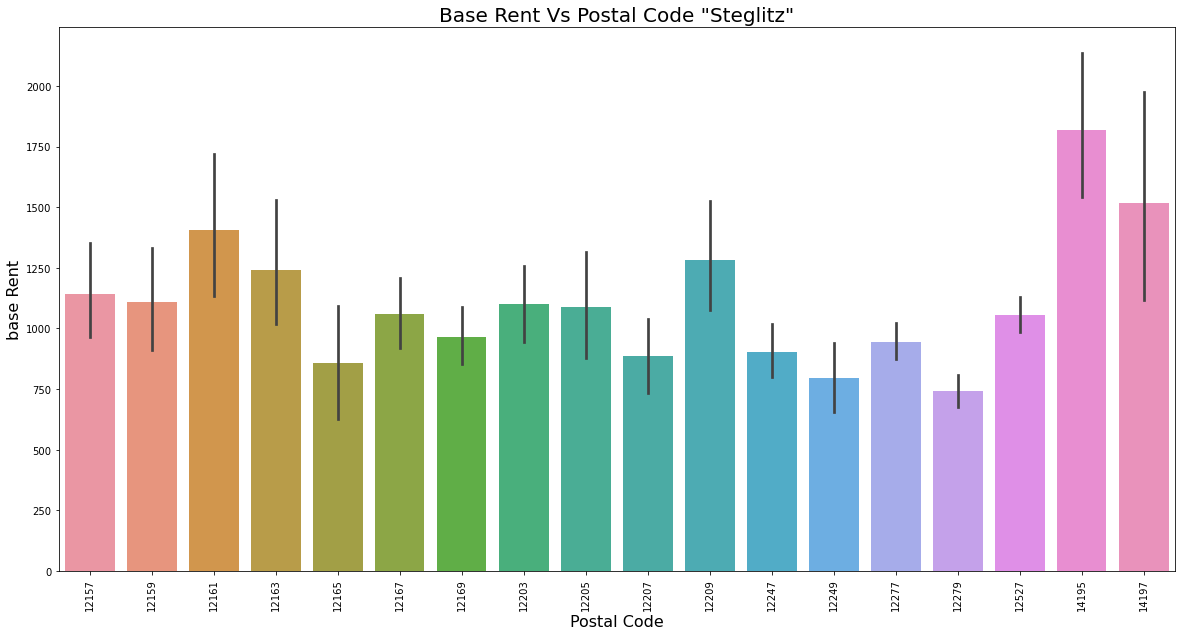

In [28]:
df_berlin_06_Steglitz = df_berlin[df_berlin['Ortsteil'].str.contains("Steglitz")]
print("The mean base rent in Steglitz is: ", round(df_berlin_06_Steglitz['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Steglitz is: ", round(df_berlin_06_Steglitz['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Steglitz is: ", round(df_berlin_06_Steglitz['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_06_Steglitz),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_06_Steglitz)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Steglitz"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Zehlendorf is:  1217.21 Euro/month
The minimum base rent in Zehlendorf is:  229.29 Euro/month
The maximum base rent in Zehlendorf is:  3582.0 Euro/month
Based on  186 records.


Text(0, 0.5, 'base Rent')

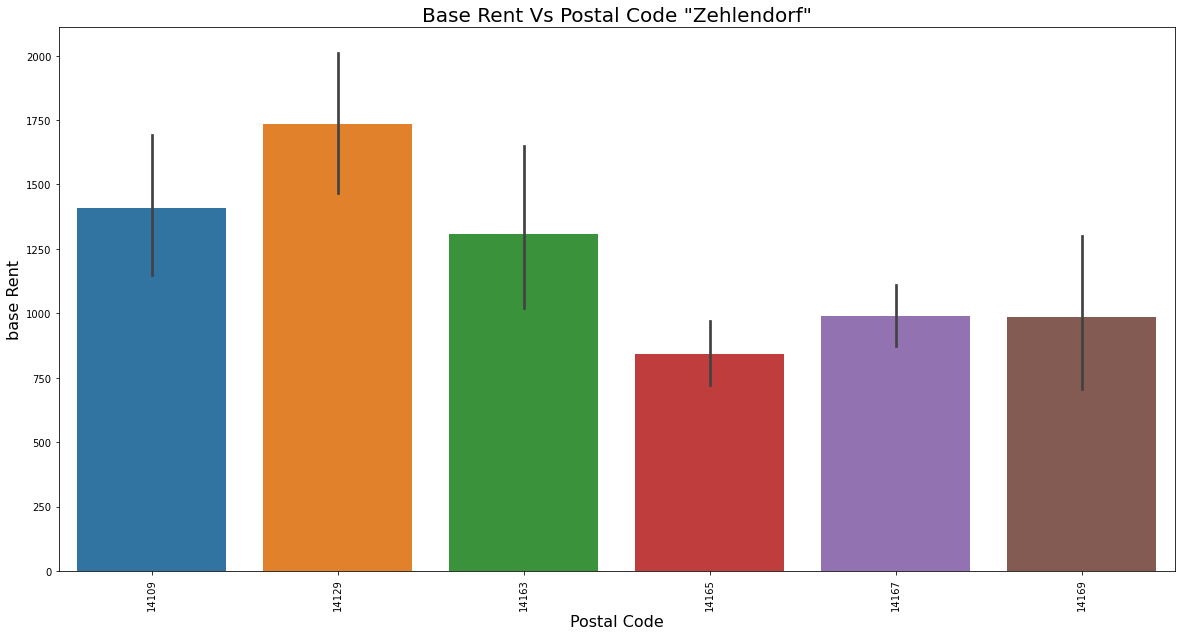

In [29]:
df_berlin_06_Zehlendorf = df_berlin[df_berlin['Ortsteil'].str.contains("Zehlendorf")]
print("The mean base rent in Zehlendorf is: ", round(df_berlin_06_Zehlendorf['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Zehlendorf is: ", round(df_berlin_06_Zehlendorf['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Zehlendorf is: ", round(df_berlin_06_Zehlendorf['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_06_Zehlendorf),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_06_Zehlendorf)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Zehlendorf"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Tempelhof is:  987.29 Euro/month
The minimum base rent in Tempelhof is:  199.0 Euro/month
The maximum base rent in Tempelhof is:  4200.0 Euro/month
Based on  435 records.


Text(0, 0.5, 'base Rent')

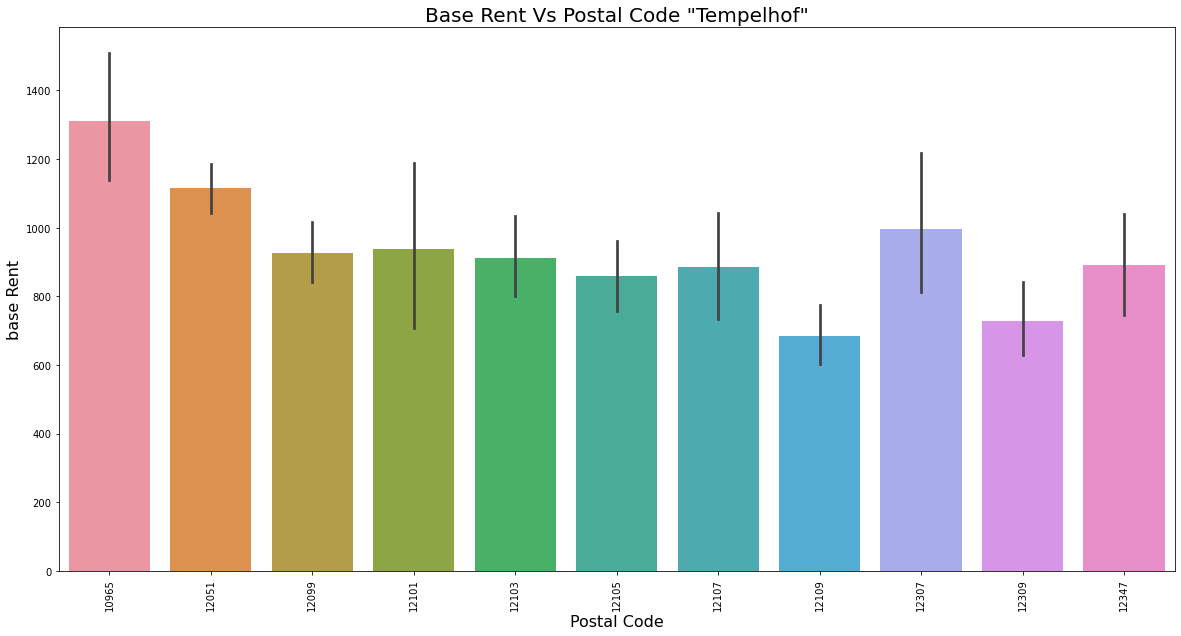

In [30]:
df_berlin_07_Tempelhof = df_berlin[df_berlin['Ortsteil'].str.contains("Tempelhof")]
print("The mean base rent in Tempelhof is: ", round(df_berlin_07_Tempelhof['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Tempelhof is: ", round(df_berlin_07_Tempelhof['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Tempelhof is: ", round(df_berlin_07_Tempelhof['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_07_Tempelhof),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_07_Tempelhof)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Tempelhof"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Schöneberg is:  1499.19 Euro/month
The minimum base rent in Schöneberg is:  202.4 Euro/month
The maximum base rent in Schöneberg is:  5600.0 Euro/month
Based on  586 records.


Text(0, 0.5, 'base Rent')

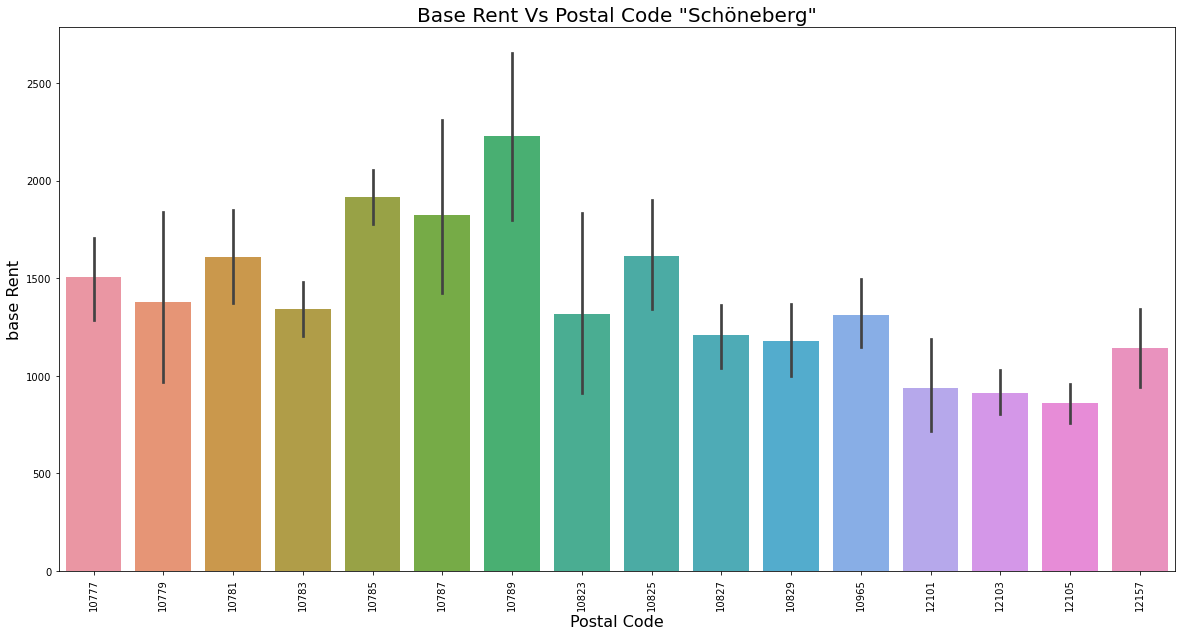

In [31]:
df_berlin_07_Schöneberg = df_berlin[df_berlin['Ortsteil'].str.contains("Schöneberg")]
print("The mean base rent in Schöneberg is: ", round(df_berlin_07_Schöneberg['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Schöneberg is: ", round(df_berlin_07_Schöneberg['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Schöneberg is: ", round(df_berlin_07_Schöneberg['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_07_Schöneberg),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_07_Schöneberg)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Schöneberg"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Neukölln is:  995.53 Euro/month
The minimum base rent in Neukölln is:  197.15 Euro/month
The maximum base rent in Neukölln is:  4200.0 Euro/month
Based on  714 records.


Text(0, 0.5, 'base Rent')

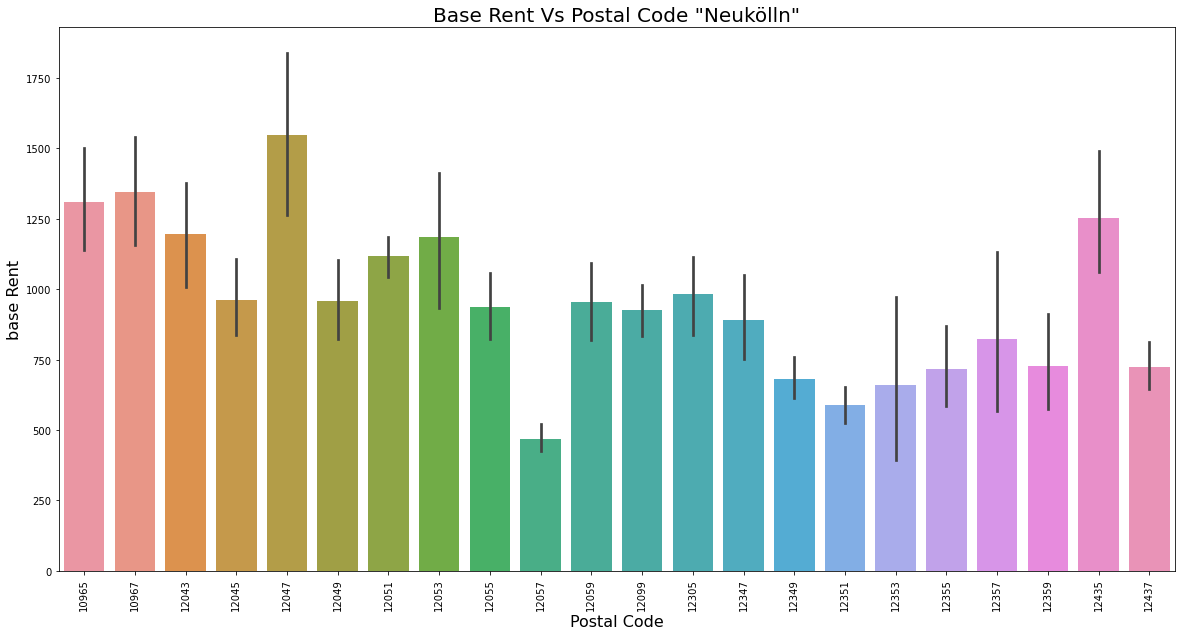

In [32]:
df_berlin_08_Neukölln = df_berlin[df_berlin['Ortsteil'].str.contains("Neukölln")]
print("The mean base rent in Neukölln is: ", round(df_berlin_08_Neukölln['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Neukölln is: ", round(df_berlin_08_Neukölln['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Neukölln is: ", round(df_berlin_08_Neukölln['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_08_Neukölln),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_08_Neukölln)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Neukölln"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Treptow is:  1043.35 Euro/month
The minimum base rent in Treptow is:  319.0 Euro/month
The maximum base rent in Treptow is:  4995.0 Euro/month
Based on  658 records.


Text(0, 0.5, 'base Rent')

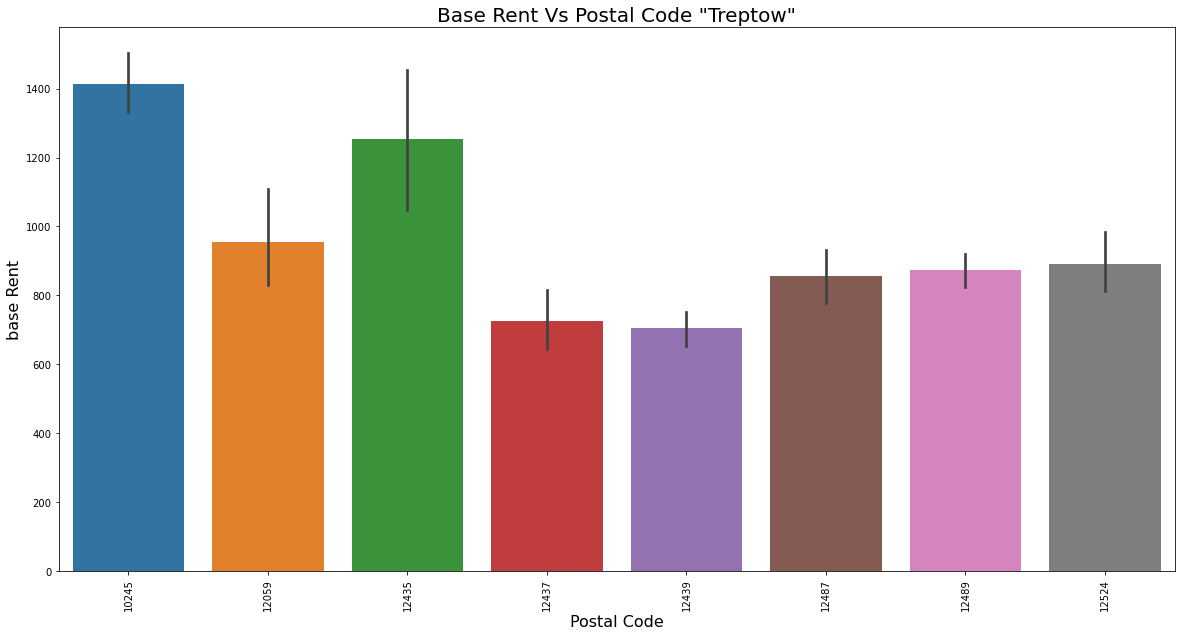

In [33]:
df_berlin_09_Treptow = df_berlin[df_berlin['Ortsteil'].str.contains("Treptow")]
print("The mean base rent in Treptow is: ", round(df_berlin_09_Treptow['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Treptow is: ", round(df_berlin_09_Treptow['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Treptow is: ", round(df_berlin_09_Treptow['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_09_Treptow),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_09_Treptow)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Treptow"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Köpenick is:  849.19 Euro/month
The minimum base rent in Köpenick is:  237.1 Euro/month
The maximum base rent in Köpenick is:  3170.0 Euro/month
Based on  757 records.


Text(0, 0.5, 'base Rent')

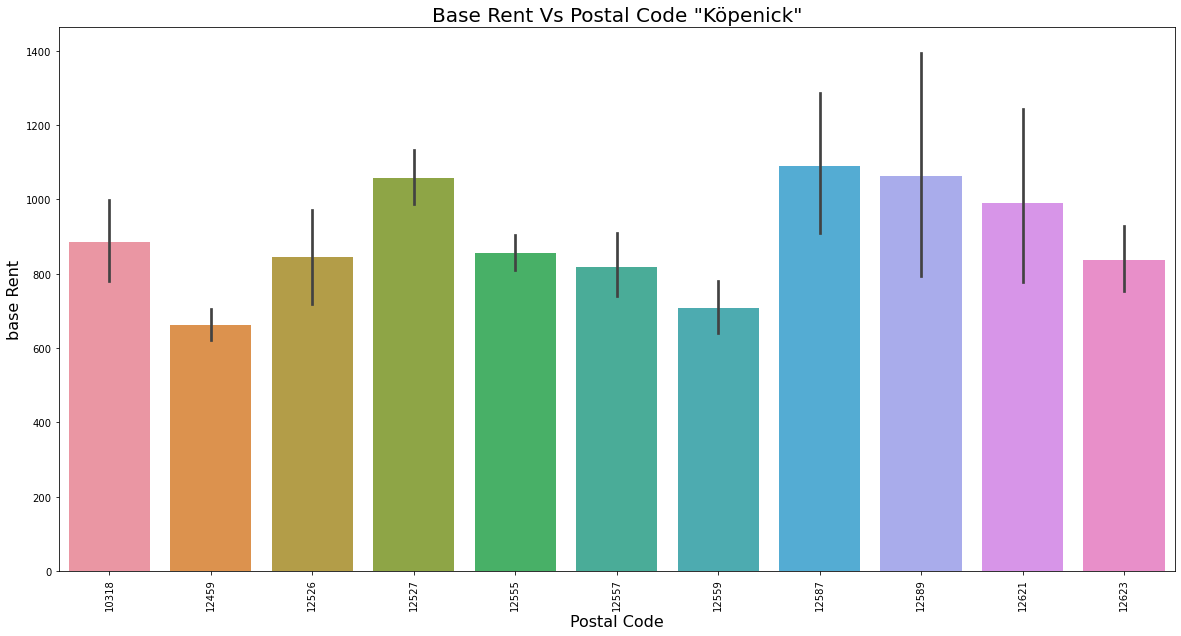

In [34]:
df_berlin_09_Köpenick = df_berlin[df_berlin['Ortsteil'].str.contains("Köpenick")]
print("The mean base rent in Köpenick is: ", round(df_berlin_09_Köpenick['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Köpenick is: ", round(df_berlin_09_Köpenick['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Köpenick is: ", round(df_berlin_09_Köpenick['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_09_Köpenick),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_09_Köpenick)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Köpenick"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Marzahn is:  601.07 Euro/month
The minimum base rent in Marzahn is:  223.0 Euro/month
The maximum base rent in Marzahn is:  2900.0 Euro/month
Based on  517 records.


Text(0, 0.5, 'base Rent')

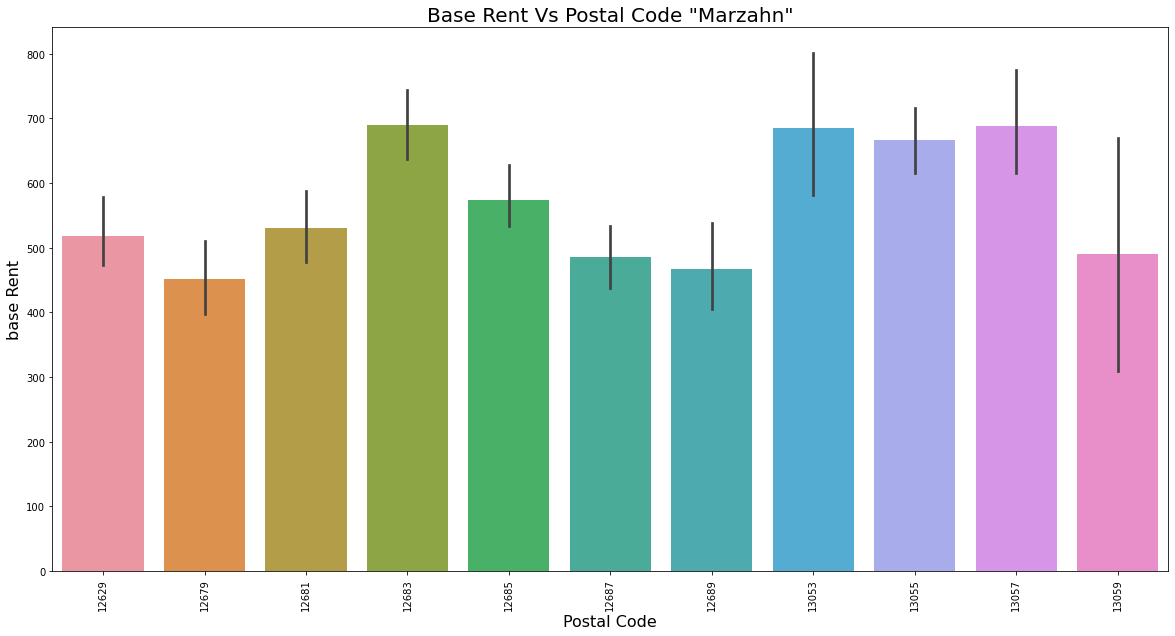

In [35]:
df_berlin_10_Marzahn = df_berlin[df_berlin['Ortsteil'].str.contains("Marzahn")]
print("The mean base rent in Marzahn is: ", round(df_berlin_10_Marzahn['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Marzahn is: ", round(df_berlin_10_Marzahn['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Marzahn is: ", round(df_berlin_10_Marzahn['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_10_Marzahn),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_10_Marzahn)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Marzahn"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Hellersdorf is:  549.38 Euro/month
The minimum base rent in Hellersdorf is:  178.16 Euro/month
The maximum base rent in Hellersdorf is:  2900.0 Euro/month
Based on  285 records.


Text(0, 0.5, 'base Rent')

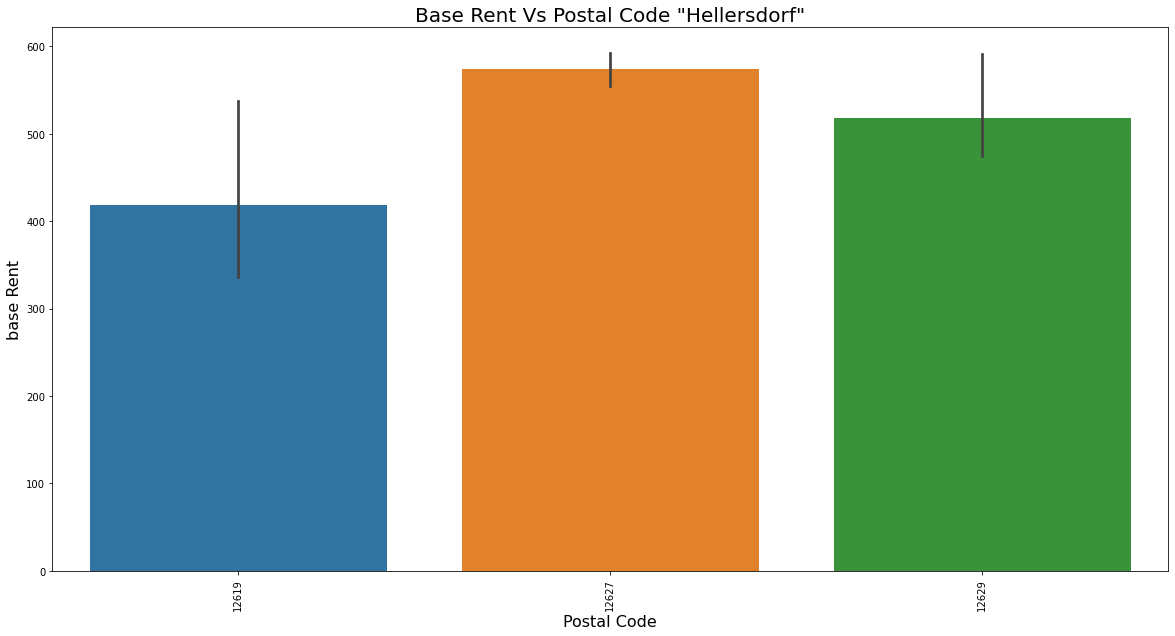

In [36]:
df_berlin_10_Hellersdorf = df_berlin[df_berlin['Ortsteil'].str.contains("Hellersdorf")]
print("The mean base rent in Hellersdorf is: ", round(df_berlin_10_Hellersdorf['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Hellersdorf is: ", round(df_berlin_10_Hellersdorf['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Hellersdorf is: ", round(df_berlin_10_Hellersdorf['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_10_Hellersdorf),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_10_Hellersdorf)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Hellersdorf"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Lichtenberg is:  730.67 Euro/month
The minimum base rent in Lichtenberg is:  178.16 Euro/month
The maximum base rent in Lichtenberg is:  2786.39 Euro/month
Based on  486 records.


Text(0, 0.5, 'base Rent')

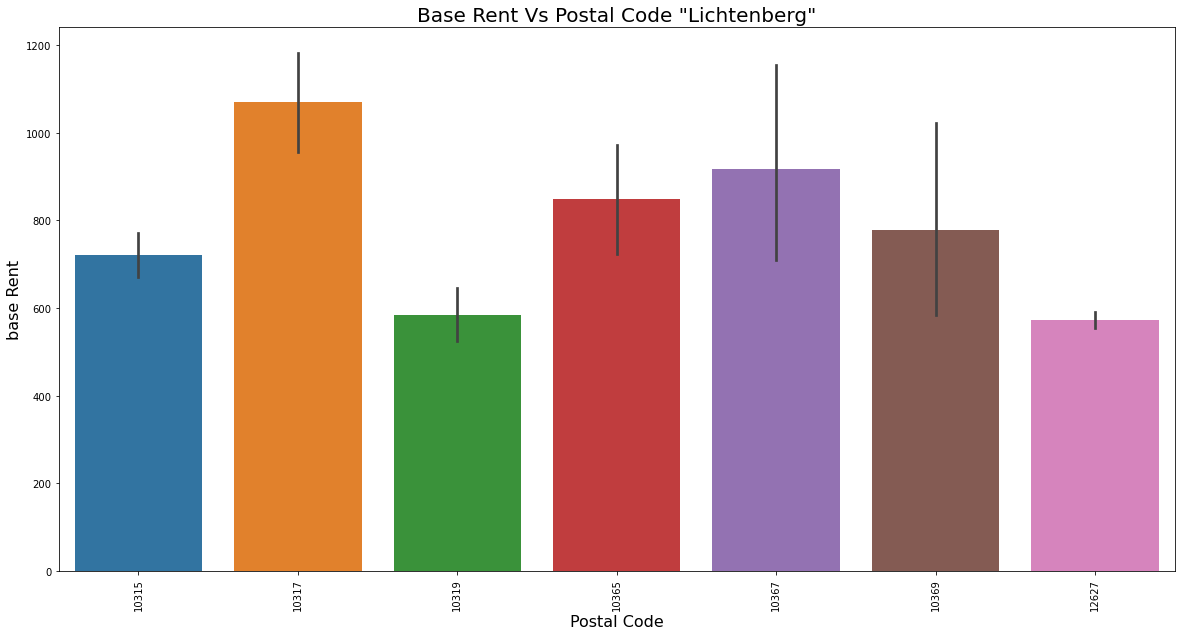

In [37]:
df_berlin_11_Lichtenberg = df_berlin[df_berlin['Ortsteil'].str.contains("Lichtenberg")]
print("The mean base rent in Lichtenberg is: ", round(df_berlin_11_Lichtenberg['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Lichtenberg is: ", round(df_berlin_11_Lichtenberg['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Lichtenberg is: ", round(df_berlin_11_Lichtenberg['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_11_Lichtenberg),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_11_Lichtenberg)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Lichtenberg"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

The mean base rent in Reinickendorf is:  827.91 Euro/month
The minimum base rent in Reinickendorf is:  261.92 Euro/month
The maximum base rent in Reinickendorf is:  2999.0 Euro/month
Based on  606 records.


Text(0, 0.5, 'base Rent')

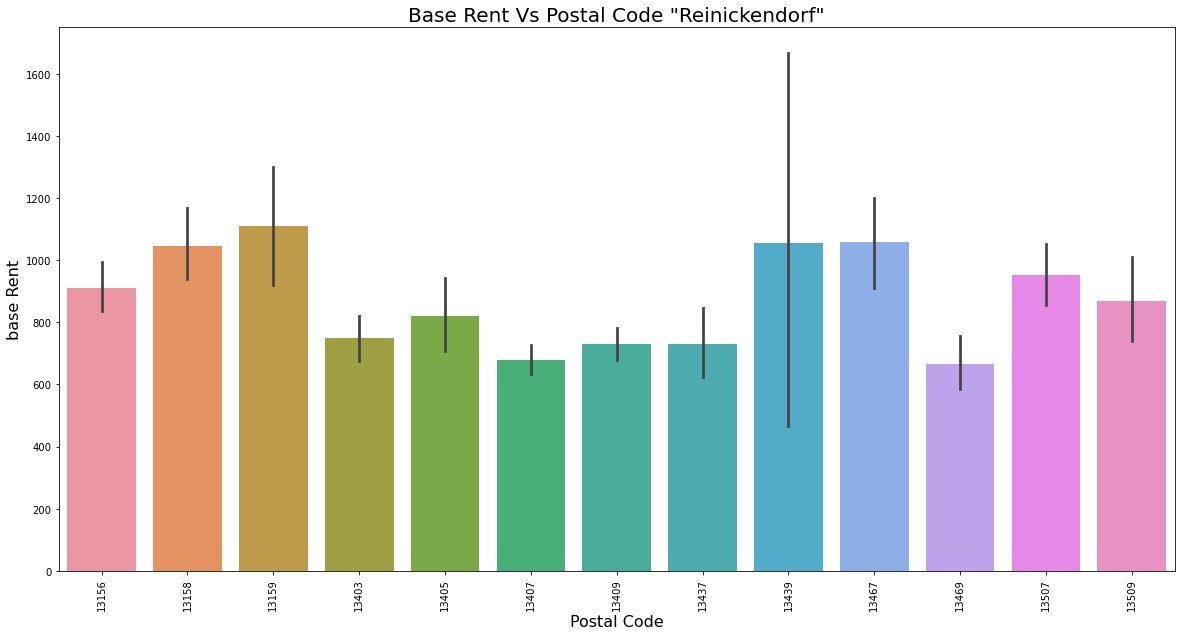

In [38]:
df_berlin_12_Reinickendorf = df_berlin[df_berlin['Ortsteil'].str.contains("Reinickendorf")]
print("The mean base rent in Reinickendorf is: ", round(df_berlin_12_Reinickendorf['baseRent'].mean(),2), "Euro/month")
print("The minimum base rent in Reinickendorf is: ", round(df_berlin_12_Reinickendorf['baseRent'].min(),2), "Euro/month")
print("The maximum base rent in Reinickendorf is: ", round(df_berlin_12_Reinickendorf['baseRent'].max(),2), "Euro/month")
print("Based on ",len(df_berlin_12_Reinickendorf),"records.")
plt.figure(figsize = (20,10))
ax = sns.barplot(x = 'geo_plz', y = 'baseRent', data = df_berlin_12_Reinickendorf)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Base Rent Vs Postal Code "Reinickendorf"', fontsize = 20)
plt.xlabel('Postal Code', fontsize = 16)
plt.ylabel('base Rent', fontsize = 16)

Text(0, 0.5, 'Base Rent')

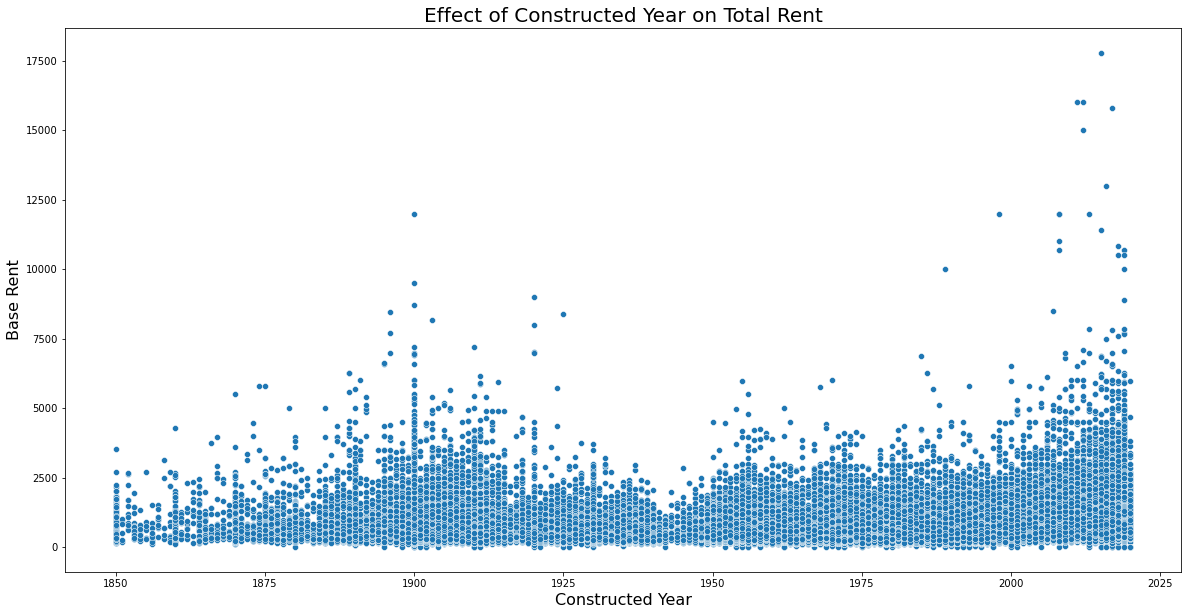

In [39]:
df_berlin2 = pd.read_csv('immo_data.csv')
df_berlin2.drop(df_berlin2.loc[df_berlin2['yearConstructed']<=1849].index, inplace=True)
df_berlin2.drop(df_berlin2.loc[df_berlin2['yearConstructed']>=2021].index, inplace=True)
df_berlin2.drop(df_berlin2.loc[df_berlin2['baseRent']>=20000].index, inplace=True)
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = 'yearConstructed', y = 'baseRent', data = df_berlin2)
plt.title('Effect of Constructed Year on Total Rent',fontsize=20)
plt.xlabel('Constructed Year',fontsize=16)
plt.ylabel('Base Rent',fontsize=16)